In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

## Importing all dependencies

# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# NLP and Word Cloud
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords

# Standard library imports
from string import punctuation
import re, string, unicodedata

# SKlearn and Evaluation Metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

# To Supress Warning
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
   for filename in filenames:
       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[nltk_data] Error loading stopwords: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
[nltk_data] Error loading punkt_tab: <urlopen error [Errno -3]
[nltk_data]     Temporary failure in name resolution>
/kaggle/input/e-commerce-customer-reviews-dataset/e commerce reviews test.csv
/kaggle/input/e-commerce-customer-reviews-dataset/e commerce reviews train.csv


In [2]:
train_dataset = pd.read_csv('/kaggle/input/e-commerce-customer-reviews-dataset/e commerce reviews test.csv')
test_dataset = pd.read_csv('/kaggle/input/e-commerce-customer-reviews-dataset/e commerce reviews train.csv')

In [3]:
train_dataset.head()

,labels,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [4]:
test_dataset.head()

,labels,text
0,__label__2,Stuning even for the non-gamer: This sound tra...
1,__label__2,The best soundtrack ever to anything.: I'm rea...
2,__label__2,Amazing!: This soundtrack is my favorite music...
3,__label__2,Excellent Soundtrack: I truly like this soundt...
4,__label__2,"Remember, Pull Your Jaw Off The Floor After He..."


In [5]:
print(train_dataset.shape)
print(test_dataset.shape)

(400000, 2)
(3600010, 2)


In [6]:
print('Train Dataset Information')
print(train_dataset.info())
print('Test Dataset Information')
print(test_dataset.info())

Train Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   labels  400000 non-null  object
 1   text    400000 non-null  object
dtypes: object(2)
memory usage: 6.1+ MB
None
Test Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600010 entries, 0 to 3600009
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   labels  object
 1   text    object
dtypes: object(2)
memory usage: 54.9+ MB
None


In [7]:
## Checking for Null values within both datasets
print('Checking for Null Values in the Train Dataset')
train_dataset.isnull().sum()

Checking for Null Values in the Train Dataset


labels    0
text      0
dtype: int64

In [8]:
print('Checking for Null Values in the Test Dataset')
test_dataset.isnull().sum()

Checking for Null Values in the Test Dataset


labels    0
text      0
dtype: int64

In [9]:
train_dataset.describe()

,labels,text
count,400000,400000
unique,2,400000
top,__label__2,Great CD: My lovely Pat has one of the GREAT v...
freq,200000,1


### DATA CLEANING AND PREPROCESSING

In [10]:
# Initialize the list of stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(content):
    """
    Tokenize, convert text to lowercase and remove stops like this, is,to 
    """
    # Convert text to lowercase and tokenize
    tokens = word_tokenize(content.lower())
    # Remove stopwords (and optionally punctuation or other unwanted tokens)
    filtered_tokens = [word for word in tokens if word not in stop_words and word.isalpha()]
    # Reconstruct the text from the filtered tokens
    cleaned_text = " ".join(filtered_tokens)
    return cleaned_text

# Test Case
Test_case_for_remove_stop_words= "This is an example sentence, to demonstrate how to remove stopwords."
cleaned_text = remove_stopwords(Test_case_for_remove_stop_words)
print(cleaned_text)

example sentence demonstrate remove stopwords


In [11]:
# Expansion of English Contractions
def contraction_expansion(content):
  """
  Expand English Contracted words like won't, didn't.
  """
  content = re.sub(r'won\'t', 'would not', content)
  content = re.sub(r'didn\'t', 'did not', content)
  content = re.sub(r'can\'t', 'can not', content)
  content = re.sub(r'don\'t', 'do not', content)
  content = re.sub(r'won\'t', 'would not', content)
  content = re.sub(r'doesn\'t', 'does not', content)
  content = re.sub(r'mightn\'t', 'might not', content)
  content = re.sub(r'shouldn\'t', 'should not', content)
  content = re.sub(r'weren\'t', 'were not', content)
  content = re.sub(r'hasn\'t', 'has not', content)
  content = re.sub(r'haven\'t', 'have not', content)
  content = re.sub(r'needn\'t', 'need not', content)
  content = re.sub(r'\'re', ' are', content)
  content = re.sub(r'\'ve', ' have', content)
  content = re.sub(r'\'ll', ' will', content)
  content = re.sub(r'\'s', ' is', content)
  content = re.sub(r'\'m', ' am', content)
  return content

# Test Case For Words Contraction Expansion:
Test_case_for_words_contraction_expansion = "I'm going to the park, but I can't find my keys. They won't be happy about it."
expanded_sample = contraction_expansion(Test_case_for_words_contraction_expansion)
print(expanded_sample)


I am going to the park, but I can not find my keys. They would not be happy about it.


In [12]:
def remove_special_characters(content):
    """
    Remove the Special Characters
    """
    # Replacing special characters with
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', content)
    return cleaned_text

# Test Case for Removing Special Characters
Test_case_for_removing_special_characters = "Hello!!! This (example) #text contains @special$ characters??."
cleaned_text = remove_special_characters(Test_case_for_removing_special_characters)
print(cleaned_text)


Hello This example text contains special characters


In [13]:
def remove_urls(text):
    """
    Remove URLs.
    """
    # Replaces urls with a space
    return re.sub(r'http\S+|www\.\S+', '', text)

# Test Case for removing URLs
Test_case_for_removing_urls = "Check out https://www.example.com or visit www.example.org for more info!"
cleaned_text = remove_urls(Test_case_for_removing_urls)
print(cleaned_text)


Check out  or visit  for more info!


In [14]:
def clean_text(content):
    """
    Apply all the preprocessed funtions into one summarised function
    """
    # Expand contractions
    content = contraction_expansion(content)
    # Remove URLs
    content = remove_urls(content)
    # Remove special characters
    content = remove_special_characters(content)
    # Remove stopwords (and make everything lowercase)
    content = remove_stopwords(content)

    return content

## Test Case for Total cleaning
Test_case_for_text_cleaning = "This is an example sentence, to demonstrate how to remove stopwords.I'm going to the park, but I can't find my keys. They won't be happy about it.Hello!!! This (example) #text contains @special$ characters??.Check out https://www.example.com or visit www.example.org for more info!"
cleaned_text = clean_text(Test_case_for_text_cleaning)
print(cleaned_text)

example sentence demonstrate remove stopwordsi going park find keys would happy ithello example text contains special characterscheck visit info


In [15]:
# Apply the cleaning function
train_dataset["text"] = train_dataset["text"].apply(clean_text)
test_dataset["text"] = test_dataset["text"].apply(clean_text)


### EXPLORATIVE DATA ANALYSIS

In [16]:
mapping_dict = {
    '__label__1' : 'negative',
    '__label__2'	: 'positive'
}

train_dataset['labels'] = train_dataset['labels'].map(mapping_dict)
test_dataset['labels'] = test_dataset['labels'].map(mapping_dict)


In [17]:
train_dataset.head()


,labels,text
0,positive,great cd lovely pat one great voices generatio...
1,positive,one best game music soundtracks game really pl...
2,negative,batteries died within year bought charger jul ...
3,positive,works fine maha energy better check maha energ...
4,positive,great nonaudiophile reviewed quite bit combo p...


In [18]:
print(train_dataset['labels'].value_counts())
print(test_dataset['labels'].value_counts())


labels
positive    200000
negative    200000
Name: count, dtype: int64
labels
positive    1800009
negative    1800001
Name: count, dtype: int64


In [19]:
## Word Frequency 
## Checking for the most common words used
from collections import Counter

# Combine all reviews into one large text (already cleaned)
all_text = " ".join(train_dataset["text"].tolist())

# Split into individual words/tokens
tokens = all_text.split()

# Count word frequencies
word_freq = Counter(tokens)

# Show the 20 most common words
print(word_freq.most_common(20))


[('book', 214622), ('one', 147946), ('great', 117298), ('like', 112719), ('good', 112380), ('would', 103669), ('get', 75901), ('read', 75725), ('time', 71363), ('movie', 65603), ('really', 63652), ('well', 56006), ('much', 55584), ('first', 55198), ('even', 54896), ('love', 51206), ('buy', 49230), ('product', 48164), ('best', 46220), ('use', 44931)]


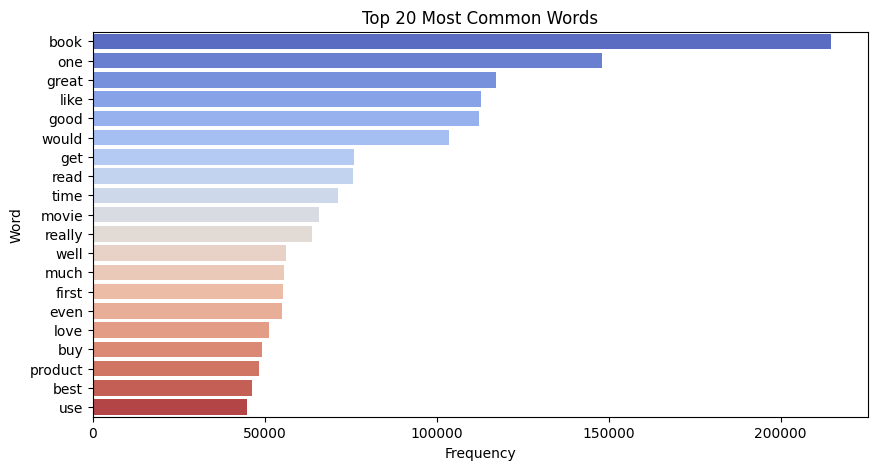

In [20]:
common_words = word_freq.most_common(20)
words = [w[0] for w in common_words]
counts = [w[1] for w in common_words]

plt.figure(figsize=(10,5))
sns.barplot(x=counts, y=words, palette="coolwarm")
plt.title("Top 20 Most Common Words")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()


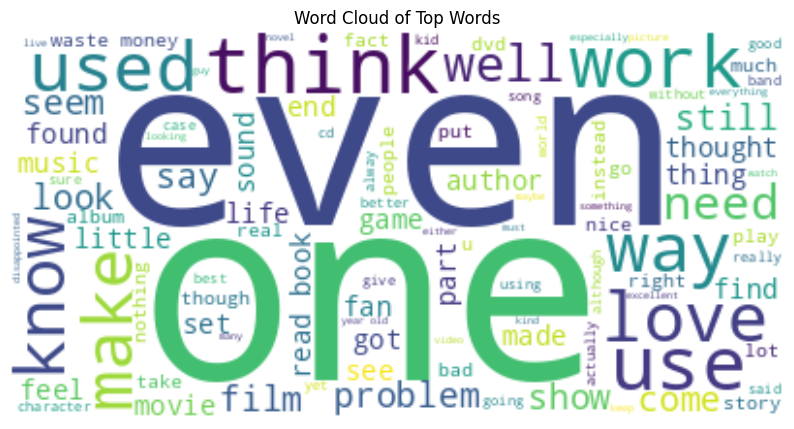

In [21]:
## Word CLoud

wordcloud = WordCloud(background_color="white", max_words=100).generate(all_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top Words")
plt.show()


In [22]:
## Checking for multi-word phrases that might carry strong sentiment
from nltk import ngrams

tokens = all_text.split()
bigrams = list(ngrams(tokens, 2))
trigram_freq = Counter(bigrams)
print(trigram_freq.most_common(10))


[(('waste', 'money'), 9848), (('read', 'book'), 9790), (('would', 'recommend'), 8061), (('one', 'best'), 6657), (('year', 'old'), 6469), (('much', 'better'), 6465), (('highly', 'recommend'), 6283), (('waste', 'time'), 6054), (('great', 'book'), 5398), (('years', 'ago'), 5168)]


In [23]:
## split the training dataset into train set and validation set
train_df, val_df = train_test_split(train_dataset, test_size=0.2, random_state=42, stratify=train_dataset["labels"])
print(train_df.shape, val_df.shape)


(320000, 2) (80000, 2)


In [24]:
## Prepare Data for Vectorization
X_train = train_df["text"]
y_train = train_df["labels"]

X_val = val_df["text"]
y_val = val_df["labels"]

X_test = test_dataset["text"]
y_test = test_dataset["labels"]


In [25]:
## Initialising TFidfVectorizer
tfidf = TfidfVectorizer(
    max_features=10000,     
    ngram_range=(1, 2),     
    stop_words=None    
)

# Fit on training data and transform
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform validation and test data
X_val_tfidf = tfidf.transform(X_val)
X_test_tfidf = tfidf.transform(X_test)



### MODEL TRAINING AND EVALUATION

In [26]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


Logistic Regression

In [27]:

lr_model = LogisticRegression(solver='saga',max_iter=1000,n_jobs=-1)

lr_model.fit(X_train_tfidf, y_train)

val_preds = lr_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds,pos_label='positive')
recall = recall_score(y_val,val_preds,pos_label='positive')
f1 = f1_score(y_val, val_preds, average='macro')
print("Logistic Regression -> Accuracy:", accuracy, "Precision:",precision,"Recall:",recall,"F1:", f1)


Logistic Regression -> Accuracy: 0.9001375 Precision: 0.897701577835756 Recall: 0.9032 F1: 0.9001365633901901


Support Vector Machine (SVM)

In [28]:

svm_model = LinearSVC(max_iter=2000)
svm_model.fit(X_train_tfidf, y_train)

val_preds = svm_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds,pos_label='positive')
recall = recall_score(y_val,val_preds,pos_label='positive')
f1 = f1_score(y_val, val_preds, average='macro')
print("SVM -> Accuracy:", accuracy,"Precision:",precision,"Recall:",recall,"F1:", f1)


SVM -> Accuracy: 0.8991125 Precision: 0.8962692680020851 Recall: 0.9027 F1: 0.8991112015453999


Random Forest

In [29]:

rf_model = RandomForestClassifier(n_estimators=100,max_depth=None,n_jobs=-1)
rf_model.fit(X_train_tfidf, y_train)

val_preds = rf_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val, val_preds)
precision = precision_score(y_val, val_preds,pos_label='positive')
recall = recall_score(y_val,val_preds,pos_label='positive')
f1 = f1_score(y_val, val_preds, average='macro')
print("Random Forest -> Accuracy:", accuracy,"Precision:",precision,"Recall:",recall,"F1:", f1)


Random Forest -> Accuracy: 0.8618375 Precision: 0.8626080420894401 Recall: 0.860775 F1: 0.8618373440273142


XGBoost

In [30]:

xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric="logloss"
)
mapping = {"negative": 0, "positive": 1}
y_train_map = y_train.map(mapping)
y_val_map = y_val.map(mapping)

xgb_model.fit(X_train_tfidf, y_train_map)

val_preds = xgb_model.predict(X_val_tfidf)
accuracy = accuracy_score(y_val_map, val_preds)
precision = precision_score(y_val_map, val_preds,pos_label=1)
recall = recall_score(y_val_map,val_preds,pos_label=1)
f1 = f1_score(y_val_map, val_preds, average='macro')
print("XGBoost -> Accuracy:", accuracy,"Precision:",precision,"Recall:",recall, "F1:", f1)


XGBoost -> Accuracy: 0.8437875 Precision: 0.8470410094637224 Recall: 0.8391 F1: 0.8437840675210149


### Final Evaluation on the Test Set

Test Accuracy: 0.8992
Test F1 Score: 0.8995
Classification Report (Test):
              precision    recall  f1-score   support

    negative       0.90      0.90      0.90   1800001
    positive       0.90      0.90      0.90   1800009

    accuracy                           0.90   3600010
   macro avg       0.90      0.90      0.90   3600010
weighted avg       0.90      0.90      0.90   3600010



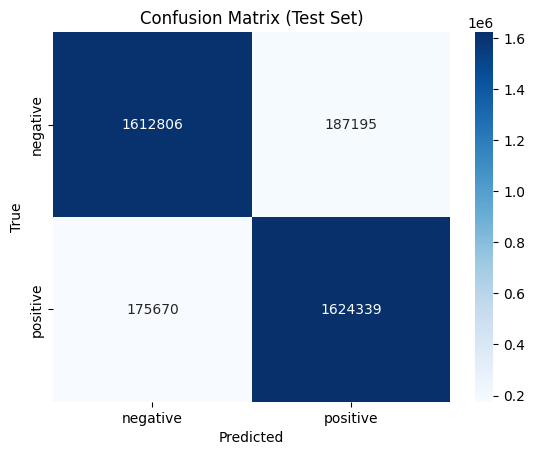

In [31]:

test_preds = lr_model.predict(X_test_tfidf)

test_accuracy = accuracy_score(y_test, test_preds)
test_f1 = f1_score(y_test, test_preds, pos_label="positive")

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

print("Classification Report (Test):")
print(classification_report(y_test, test_preds))

# Confusion matrix
cm = confusion_matrix(y_test, test_preds, labels=["negative", "positive"])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["negative", "positive"],
            yticklabels=["negative", "positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (Test Set)")
plt.show()


### SAVE MODEL AND VECTORIZER

In [32]:
import pickle

with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(lr_model, f)


In [33]:
with open("tfidf_vectorizer.pkl", "rb") as f:
    tfidf_loaded = pickle.load(f)

with open("sentiment_model.pkl", "rb") as f:
    model_loaded = pickle.load(f)
    
# Quick test
sample_text = ["This product is amazing!"]
sample_vector = tfidf_loaded.transform(sample_text)
sample_prediction = model_loaded.predict(sample_vector)
print(sample_prediction)

['positive']


In [34]:
'''
%%writefile flask_app.py
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    data = request.get_json()
    text_input = data["text"]
    X = tfidf.transform([text_input])
    prediction = model.predict(X)[0]
    return jsonify({"prediction": prediction})

if __name__ == "__main__":
    app.run(host="0.0.0.0", port=5000, debug=True)
'''

'\n%%writefile flask_app.py\nfrom flask import Flask, request, jsonify\nimport joblib\n\napp = Flask(__name__)\n\n@app.route("/predict", methods=["POST"])\ndef predict():\n    data = request.get_json()\n    text_input = data["text"]\n    X = tfidf.transform([text_input])\n    prediction = model.predict(X)[0]\n    return jsonify({"prediction": prediction})\n\nif __name__ == "__main__":\n    app.run(host="0.0.0.0", port=5000, debug=True)\n'

In [35]:
#!python flask_app.py
